In [62]:
#pip install numpy pandas matplotlib scikit-learn opencv-python tensorflow


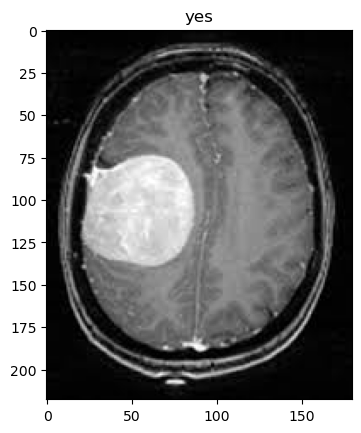

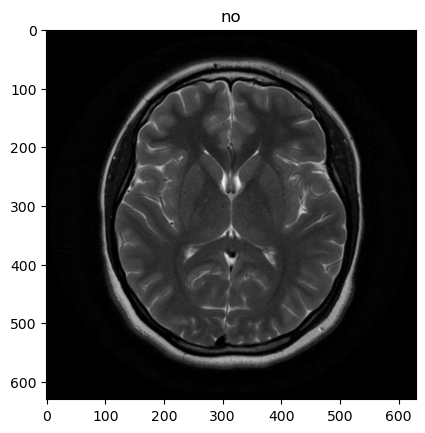

In [41]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split


DATA_DIR = r"C:\Users\HP\Desktop\brain_tumor_dataset"

CATEGORIES = ["yes", "no"]

for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path)[:5]:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.title(category)
        plt.show()
        break


In [43]:


IMG_SIZE = 128
data = []

for category in ["yes", "no"]:
    folder_path = os.path.join(DATA_DIR, category)
    label = 1 if category == "yes" else 0  # yes = tumor (1), no = no tumor (0)

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Load the image in grayscale
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            continue  # Skip if image is broken or unreadable

        # Resize the image to 128x128 pixels
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        # Add the image and its label to the data list
        data.append([image, label])


In [45]:
import random

random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array(y)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 468ms/step - accuracy: 0.5332 - loss: 0.9045 - val_accuracy: 0.6078 - val_loss: 0.5373
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.7062 - loss: 0.5584 - val_accuracy: 0.8235 - val_loss: 0.4894
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.7767 - loss: 0.4845 - val_accuracy: 0.8039 - val_loss: 0.4440
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.8236 - loss: 0.4402 - val_accuracy: 0.8627 - val_loss: 0.4211
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step - accuracy: 0.8423 - loss: 0.4017 - val_accuracy: 0.8039 - val_loss: 0.4685
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.8305 - loss: 0.3923 - val_accuracy: 0.8431 - val_loss: 0.3593
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.8260 - loss: 0.3959 - val_accuracy: 0.8627 - val_loss: 0.3276
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 0.9167 - loss: 0.2410 - val_accuracy: 0.8627 - val_loss:

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9034 - loss: 0.2511
Test Accuracy: 0.9020


In [57]:
model.evaluate(X, y)
model.save("brain_tumor_classifier.h5")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9691 - loss: 0.1116


In [60]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
IMG_SIZE = 128
# Let's get our brain tumor detector ready!
print("brain tumor classification model...")
model = load_model(r"C:\Users\HP\Downloads\model\brain_tumor_classifier.h5")

def tumor(mri_scan):
    """
    Takes an MRI scan image, processes it, and uses our model to predict
    whether a brain tumor is likely present.
    """
    print("Analyzing the MRI scan...")
    # Make it grayscale and the right size for our model
    processed_image = mri_scan.convert("L").resize((IMG_SIZE, IMG_SIZE))
    image_array = img_to_array(processed_image).reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0

    # Get the prediction from our model
    prediction = model.predict(image_array)[0][0]
    print(f"Model prediction score: {prediction:.4f}")

    # Interpret the prediction
    if prediction > 0.5:
        result = f"The model suggests a tumor might be present. please get this checked by a doctor."
    else:
        result = f"Great news! The model doesnot see a tumor. but consualt a doctor"
    return result


interface = gr.Interface(
    fn=tumor,
    inputs=gr.Image(type="pil", label="Upload your Brain MRI Scan here:"),
    outputs=gr.Text(label="Prediction Result:"),
    title="Brain Tumor Detection",
    description="Upload an MRI image of the brain"
)

print("Launching the web application")
interface.launch()

brain tumor classification model...


Launching the web application
* Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
